In [2]:
from google.colab import files
uploaded = files.upload()  # upload dataset.zip

Saving archive (1).zip to archive (1).zip


In [5]:
import zipfile
import os

with zipfile.ZipFile("archive (1).zip", 'r') as zip_ref:
    zip_ref.extractall("dataset")

# Check folders
os.listdir("dataset")


['face_classification']

In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical


In [8]:
# Path to dataset (with "happy/" and "sad/" folders)
data_dir = "/content/dataset/face_classification"
img_size = 100  # resize faces

# Haar cascade face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

X, y = [], []

for label, emotion in enumerate(["happy", "sad"]):
    folder = os.path.join(data_dir, emotion)
    for file in os.listdir(folder):
        img_path = os.path.join(folder, file)
        img = cv2.imread(img_path)
        if img is None:
            continue
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

        for (x,y1,w,h) in faces:
            face = gray[y1:y1+h, x:x+w]
            face = cv2.resize(face, (img_size, img_size))
            X.append(face)
            y.append(label)

X = np.array(X) / 255.0  # normalize
X = np.expand_dims(X, -1)  # add channel
y = np.array(y)

print("Dataset shape:", X.shape, y.shape)


Dataset shape: (149, 100, 100, 1) (149,)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 119
Testing samples: 30


In [10]:
model = Sequential([
    Flatten(input_shape=(img_size, img_size, 1)),
    Dense(128, activation="relu"),
    Dense(64, activation="relu"),
    Dense(1, activation="sigmoid")   # binary classification
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 10000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,280,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,288,449 (4.92 MB)

 Trainable params: 1,288,449 (4.92 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=16)


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.5087 - loss: 1.4446 - val_accuracy: 0.6333 - val_loss: 0.9530
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5683 - loss: 1.0663 - val_accuracy: 0.6667 - val_loss: 0.6536
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6545 - loss: 0.7082 - val_accuracy: 0.6333 - val_loss: 0.7366
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5936 - loss: 0.7693 - val_accuracy: 0.6333 - val_loss: 0.7313
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6584 - loss: 0.6302 - val_accuracy: 0.7000 - val_loss: 0.6067
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7381 - loss: 0.5370 - val_accuracy: 0.5667 - val_loss: 0.6891
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7332 - loss: 0.5482 - val_accuracy: 0.7000 - val_loss: 0.5942
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7692 - loss: 0.4809 - val_accuracy: 0.6667 - val_loss: 0.5923


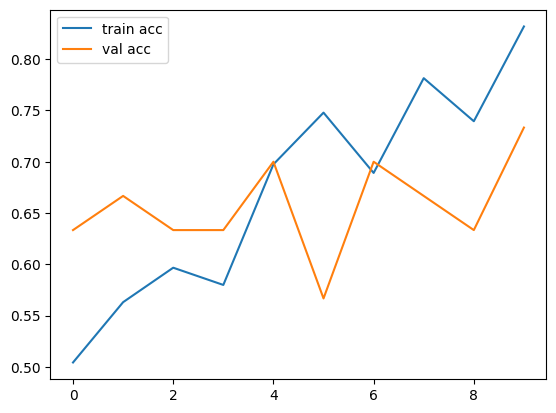

In [12]:
plt.plot(history.history["accuracy"], label="train acc")
plt.plot(history.history["val_accuracy"], label="val acc")
plt.legend()
plt.show()


In [23]:
from google.colab import files
import cv2
import matplotlib.pyplot as plt

uploaded = files.upload()  # upload any image file


Saving op.jpg to op.jpg


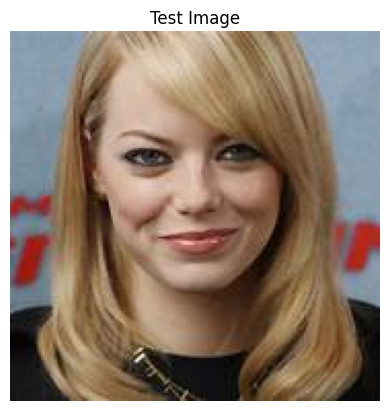

In [24]:
import numpy as np

# Get uploaded file name
for fn in uploaded.keys():
    test_path = fn

# Read image
img = cv2.imread(test_path)

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Resize to same size as training data
gray_resized = cv2.resize(gray, (img_size, img_size))

# Normalize
gray_resized = gray_resized / 255.0

# Reshape for model (1 sample, 48,48,1 channel)
gray_resized = np.expand_dims(gray_resized, axis=-1)
gray_resized = np.expand_dims(gray_resized, axis=0)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Test Image")
plt.show()

In [25]:
prediction = model.predict(gray_resized)

if prediction[0][0] > 0.5:
    print("Predicted: Happy 😀")
else:
    print("Predicted: Sad 😢")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Predicted: Sad 😢
